
### Unsupervised Learning Project
#### Done By: Tiffany Watt, Stephanie Austin, Rachel Finlayson, Munyaradzi Dhlakama

<p align="center">
  <img src="anime_1.png" alt="Deforestation (local)" width="800"/>

</p>

© ExploreAI 2024

---

## Table of Contents

<a href=#BC> Background Context</a>

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Data Collection and Description</a>

<a href=#three>3. Loading Data </a>

<a href=#four>4. Data Cleaning and Filtering</a>

<a href=#five>5. Exploratory Data Analysis (EDA)</a>

<a href=#six>6. Recommender Systems </a>

<a href=#seven>7. Evaluation and Validation</a>



In [1]:
!git add Unsupervised_Learning_Project.ipynb
!git commit -m "Updating heading etc"
!git push origin main

[main ef982a6] Updating heading etc
 Committer: Tiffany Watt <Tiffany.Watt@ninetyone.com>
Your name and email address were configured automatically based
on your username and hostname. Please check that they are accurate.
You can suppress this message by setting them explicitly. Run the
following command and follow the instructions in your editor to edit
your configuration file:

    git config --global --edit

After doing this, you may fix the identity used for this commit with:

    git commit --amend --reset-author

 1 file changed, 4067 insertions(+)
 create mode 100644 Unsupervised_Learning_Project.ipynb


To https://github.com/TiffanyWatt/Unsupervised_Learning_Project.git
   2734cb1..ef982a6  main -> main


<a id="BC"></a>
## **Background Context**
<a href=#cont>Back to Table of Contents</a>

### 📖 1.1 Introduction  
In today’s technology-driven world, recommender systems are socially and economically critical for ensuring that individuals can discover relevant content among overwhelming choice. Streaming platforms such as Netflix, Amazon Prime, Disney+, and Showmax rely on recommendation algorithms to personalize user experiences, improve engagement, and reduce decision fatigue.

…ever wondered how these platforms seem to know what you might like next?

In this project, we build a **hybrid recommender system** (collaborative and content-based) for a collection of anime titles. The goal is to predict **how a user will rate an unseen anime** based on their historical preferences and similarities across users and items.

The dataset contains thousands of users and thousands of anime titles, collected from **myanimelist.net**, providing both **user–item interaction data** and **anime metadata**.

---

### 🌍 1.2 Problem Statement  
With thousands of anime titles available across different genres, formats, and themes, users can struggle to find content that aligns with their preferences. Content platforms require intelligent systems that can:

- Personalize recommendations for users with diverse viewing histories  
- Handle sparse rating data (users rate only a small subset of available titles)  
- Make accurate predictions for anime titles a user has not yet watched  
- Address cold-start scenarios for new users or less popular anime  

This project addresses these challenges by developing a recommender system capable of accurately predicting **user ratings for unseen anime titles**, using both collaborative filtering and content-based approaches.

---

### 🎯 1.3 Objectives  
- Explore and understand user–anime rating patterns and dataset sparsity  
- Perform **Exploratory Data Analysis (EDA)** on ratings and anime metadata  
- Build a **collaborative filtering model** using user–item interactions  
- Build a **content-based recommender** using anime attributes such as genre and type  
- Combine both approaches into a **hybrid recommender system**  
- Evaluate models using rating prediction metrics such as **RMSE** and **MAE**  
- Generate predictions for unseen user–anime pairs in `test.csv`

---

### 📊 1.4 Data Source  
The dataset consists of anime metadata and user rating information sourced from **myanimelist.net**. It includes anime titles across movies, television series, OVAs, ONAs, specials, and music.

**Supplied files:**
- `anime.csv` – Anime metadata  
- `train.csv` – User ratings data  
- `test.csv` – User–anime pairs requiring rating prediction  

#### Detailed File Description  

**anime.csv**
- `anime_id` – Unique identifier for each anime title  
- `name` – Full anime title  
- `genre` – Comma-separated list of genres  
- `type` – Format (TV, Movie, OVA, ONA, etc.)  
- `episodes` – Number of episodes  
- `rating` – Average community rating (out of 10)  
- `members` – Number of community members associated with the anime  

**train.csv**
- `user_id` – Anonymized user identifier  
- `anime_id` – Anime identifier  
- `rating` – User rating (out of 10); **-1 indicates watched but not rated**  

**test.csv**
- `user_id` – Anonymized user identifier  
- `anime_id` – Anime identifier for which a rating must be predicted  

---

### 🌱 1.5 Importance of the Study  
Recommender systems play a vital role in modern content platforms by:

- Enhancing user experience through personalization  
- Reducing content discovery time  
- Increasing user engagement and retention  
- Supporting scalable and automated recommendation strategies  
- Demonstrating real-world applications of unsupervised and semi-supervised learning techniques  

---

### ❓ 1.6 Key Questions  
This project seeks to answer the following questions:

- What patterns in user behavior and anime attributes influence ratings most strongly?  
- How well does collaborative filtering perform on sparse rating data?  
- Can content-based recommendations improve predictions for less popular anime?  
- Does a hybrid recommender outperform individual approaches?  
- How can cold-start problems be mitigated using available metadata?

---

### 🛠️ 1.7 Methodology Overview  
The project follows these steps:

- Importing and inspecting the datasets  
- Data cleaning and preprocessing:
  - Handling missing values  
  - Treating unrated entries (`rating = -1`)  
  - Encoding categorical features (e.g., genres, types)  
- Performing **Exploratory Data Analysis (EDA)**  
- Building and training:
  - Collaborative filtering models  
  - Content-based recommendation models  
  - Hybrid recommender approaches  
- Evaluating models using **RMSE** and **MAE**  
- Generating final predictions for submission  

---

### 🗂️ 1.8 Notebook Structure  
- Background Context  
- Importing Packages  
- Loading the Dataset  
- Data Cleaning and Preprocessing  
- Exploratory Data Analysis (EDA)  
- Feature Engineering  
- Collaborative Filtering Model  
- Content-Based Recommendation Model  
- Hybrid Recommender System  
- Model Evaluation and Comparison  
- Final Predictions and Submission  
- Conclusion & Recommendations  
- References  

---

### ✅ 1.9 Expected Outcomes  
- Insightful visualizations of user rating behavior and anime characteristics  
- A functioning collaborative filtering recommender system  
- A content-based recommender leveraging anime metadata  
- A hybrid model demonstrating improved predictive performance  
- A correctly formatted submission file with predicted ratings for unseen anime  

---


<a href=#one></a>
## **1. Importing Packages**
<a href=#cont>Back to Table of Contents</a>

**Purpose:**  
Set up the Python environment with all libraries required for data manipulation, exploratory analysis, unsupervised learning, and recommender system modeling.

**Details:**  
The following packages support:
- Data handling and preprocessing  
- Visualization for exploratory data analysis  
- Unsupervised learning and matrix factorization  
- Similarity-based and collaborative filtering approaches  
- Model evaluation 
---

In [2]:
import numpy as np
import pandas as pd
import csv
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

# Displays output inline
%matplotlib inline

# Libraries for Handing Errors
import warnings
warnings.filterwarnings('ignore')

---
<a href=#two></a>
## **2. Data Collection and Description**
<a href=#cont>Back to Table of Contents</a>

### 2.1 Data Source  
The dataset used in this project was sourced from **MyAnimeList.net**, a popular online platform where users track, rate, and review anime content. The data was made publicly available through a curated dataset hosted on Kaggle, which aggregates user–anime interaction data and anime metadata.

The dataset captures both:
- **User behavior** (ratings assigned to anime titles), and  
- **Item attributes** (metadata describing each anime).

This dual structure makes it well-suited for developing **collaborative**, **content-based**, and **hybrid** recommender systems.

---

### 2.2 Data Collection Method  
The data was originally collected through web-based aggregation of user activity on MyAnimeList.net, including user ratings and anime metadata. The Kaggle dataset provides the cleaned and structured output of this process, eliminating the need for direct API calls or web scraping within this project.

The data is provided as static CSV files, ensuring reproducibility and consistency across analyses.

---

### 2.3 Dataset Overview  
The dataset consists of three primary files:

- **anime.csv** – Contains metadata for anime titles  
- **train.csv** – Contains historical user ratings  
- **test.csv** – Contains user–anime pairs for which ratings must be predicted  

Together, these datasets represent:
- Thousands of unique users  
- Thousands of unique anime titles  
- Millions of user–anime interaction records  

The ratings data is inherently **sparse**, as most users have rated only a small subset of available anime titles — a common characteristic of real-world recommender system datasets.

---

### 2.4 Data Types and Features  

#### Anime Metadata (`anime.csv`)
This file contains **categorical**, **numerical**, and **text-based** features, including:
- Categorical: anime type (TV, Movie, OVA, ONA, etc.)
- Textual: genre labels
- Numerical: number of episodes, average rating, number of members

These features are primarily used for **content-based filtering** and cold-start scenarios.

#### User Ratings (`train.csv`)
This file contains:
- Discrete numerical ratings (0–10 scale)
- User and item identifiers

A rating value of **-1** indicates that a user watched an anime but did not explicitly rate it. These entries require special handling during preprocessing.

#### Prediction Targets (`test.csv`)
This file contains only user and anime identifiers. The absence of ratings makes it the target dataset for generating predictions using trained recommender models.

---

### 2.5 Data Suitability for Unsupervised Learning  
The dataset is well-suited for unsupervised and semi-supervised learning approaches due to:
- The absence of explicit labels beyond user ratings  
- High-dimensional user–item interaction space  
- Natural clustering of users and items based on preferences  
- Availability of auxiliary content features for similarity-based modeling  

These characteristics enable the use of techniques such as **matrix factorization**, **cosine similarity**, and **latent factor models** to uncover hidden patterns in user preferences.



---
<a href=#three></a>
## **3. Loading Data**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Load the datasets into the notebook for inspection, manipulation, and analysis.
* **Details:** This section demonstrates how the raw data files are loaded and provides an initial view of their structure to understand the available features and records.
---

In [8]:
# loading dataset
df_anime = pd.read_csv("anime.csv")
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

# Check the first few rows to confirm it loaded correctly
df_anime.head()


,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [6]:
df_train.head()

,user_id,anime_id,rating
0,1,11617,10
1,1,11757,10
2,1,15451,10
3,2,11771,10
4,3,20,8


In [7]:
df_test.head()

,user_id,anime_id
0,40763,21405
1,68791,10504
2,40487,1281
3,55290,165
4,72323,11111


In [10]:
print("Anime dataset shape:", df_anime.shape)
print("Training dataset shape:", df_train.shape)
print("Test dataset shape:", df_test.shape)

Anime dataset shape: (12294, 7)
Training dataset shape: (5703555, 3)
Test dataset shape: (633686, 2)


---
<a href=#four></a>
## **4. Data Cleaning and Filtering**
<a href=#cont>Back to Table of Contents</a>

**Purpose:**  
Prepare the raw datasets for analysis and model development by addressing missing values, invalid entries, and inconsistencies that may negatively impact recommender system performance.

**Details:**  
This section focuses on:
- Handling missing and anomalous values  
- Cleaning anime metadata  
- Filtering and preparing user ratings  
- Ensuring consistency across datasets  
---

> <span style="color:blue; font-weight:bold">
Important: First we copy the data to a new dataframe to ensure that we don’t override the raw data
</span>

In [11]:
# The copy of the dataframe
df_anime_copy = df_anime.copy()
df_test_copy = df_test.copy()
df_train_copy = df_train.copy()

### 4.1 Checking for Missing Values

Before applying any transformations, the datasets are examined for missing values to understand the extent of data quality issues.


In [13]:
# Check missing values in each dataset
print("Missing values in anime dataset:")
print(df_anime_copy.isnull().sum())

print("\nMissing values in training dataset:")
print(df_train_copy.isnull().sum())

print("\nMissing values in test dataset:")
print(df_test_copy.isnull().sum())

Missing values in anime dataset:
anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

Missing values in training dataset:
user_id     0
anime_id    0
rating      0
dtype: int64

Missing values in test dataset:
user_id     0
anime_id    0
dtype: int64


### 4.2 Cleaning Anime Metadata

- Missing genre values are filled with "Unknown"

- Missing episodes values are replaced with 0

- Missing rating values are retained as-is, as they represent community averages and are not directly used in collaborative filtering

In [14]:
# Handle missing values in anime metadata
df_anime_copy['genre'] = df_anime_copy['genre'].fillna("Unknown")
df_anime_copy['episodes'] = df_anime_copy['episodes'].fillna(0)

### 4.3 Handling Invalid and Unrated User Ratings

In the training dataset, a rating value of -1 indicates that a user watched an anime but did not provide an explicit rating.
Since the goal is to predict numeric ratings, these entries are excluded from model training.

This filtering ensures that only meaningful user feedback is used for learning latent preferences.


In [15]:
# Remove unrated entries (rating = -1)
df_train_copy_clean = df_train_copy[df_train_copy['rating'] != -1].copy()

### 4.4 Data Type Validation

Ensuring that key columns have appropriate data types helps avoid errors during model training.



In [17]:
# Validate data types
df_train_copy_clean['user_id'] = df_train_copy_clean['user_id'].astype(int)
df_train_copy_clean['anime_id'] = df_train_copy_clean['anime_id'].astype(int)
df_train_copy_clean['rating'] = df_train_copy_clean['rating'].astype(float)

df_anime_copy['anime_id'] = df_anime_copy['anime_id'].astype(int)

### 4.5 Filtering to Common Anime Titles

To ensure consistency between metadata and ratings data, only anime titles present in both datasets are retained.

In [19]:
# Keep only anime that appear in both datasets
common_anime_ids = set(df_anime_copy['anime_id']).intersection(
    set(df_train_copy_clean['anime_id'])
)

df_anime_copy_clean = df_anime_copy[df_anime_copy['anime_id'].isin(common_anime_ids)].copy()
df_train_copy_clean = df_train_copy_clean[df_train_copy_clean['anime_id'].isin(common_anime_ids)]

### 4.6 Final Dataset Summary

- Removed unrated user interactions (rating = -1)
- Handled missing anime metadata values
- Ensured consistent data types across datasets
- Filtered datasets to retain only overlapping anime titles
- These steps ensure the data is well-structured and suitable for building collaborative, content-based, and hybrid recommender models.

In [20]:
print("Cleaned anime dataset shape:", df_anime_copy_clean.shape)
print("Cleaned training dataset shape:", df_train_copy_clean.shape)
print("Test dataset shape (unchanged):", df_test_copy.shape)

Cleaned anime dataset shape: (9837, 7)
Cleaned training dataset shape: (5703553, 3)
Test dataset shape (unchanged): (633686, 2)


---
<a href=#five></a>
## **5. Exploratory Data Analysis (EDA)**
<a href=#cont>Back to Table of Contents</a>

This section examines:
- Distribution of user ratings  
- User activity levels  
- Anime popularity trends  
- Dataset sparsity  
- Genre and content characteristics  

    Insights gained here inform feature engineering and model selection in later stages.
---


### 5.1 Distribution of User Ratings

Understanding the distribution of ratings helps identify user bias, skewness, and overall sentiment.

- Observation: Ratings tend to cluster around higher values, indicating generally positive user sentiment toward anime content.

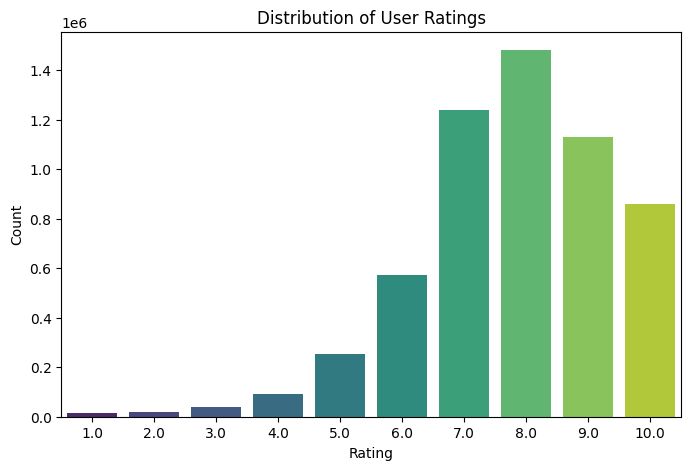

In [21]:
plt.figure(figsize=(8,5))
sns.countplot(x='rating', data=df_train_copy_clean, palette='viridis')
plt.title("Distribution of User Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

### 5.2 User Activity Analysis

The number of ratings per user highlights engagement levels and sparsity across users.

- Observation: Most users have rated relatively few anime titles, while a small subset of highly active users contribute a large number of ratings — a common long-tail pattern in recommender datasets.


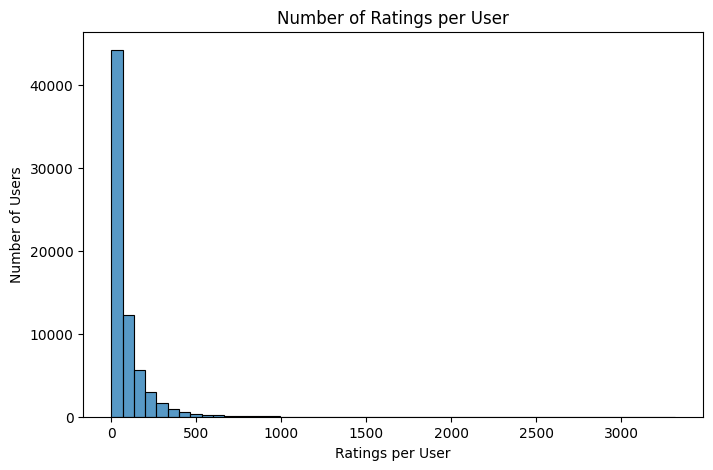

In [22]:
user_rating_counts = df_train_copy_clean.groupby('user_id')['rating'].count()

plt.figure(figsize=(8,5))
sns.histplot(user_rating_counts, bins=50, kde=False)
plt.title("Number of Ratings per User")
plt.xlabel("Ratings per User")
plt.ylabel("Number of Users")
plt.show()

#### 5.3. Anime Popularity Analysis
Anime popularity is measured by the number of ratings each title has received.

- Observation: A small number of anime titles receive a disproportionately large number of ratings, while many titles are rated infrequently.

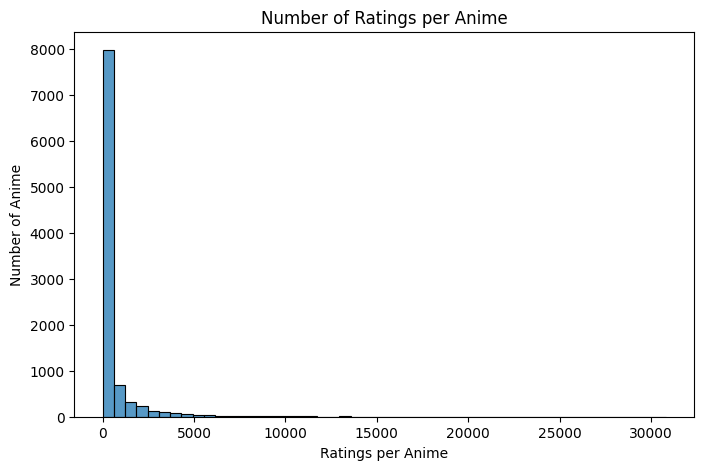

In [23]:
anime_rating_counts = df_train_copy_clean.groupby('anime_id')['rating'].count()

plt.figure(figsize=(8,5))
sns.histplot(anime_rating_counts, bins=50, kde=False)
plt.title("Number of Ratings per Anime")
plt.xlabel("Ratings per Anime")
plt.ylabel("Number of Anime")
plt.show()

#### 5.4. Most Frequently Rated Anime
Identifying the most frequently rated anime provides insight into popular content.
- Observation:The most frequently rated anime tend to be widely known series or franchises, often in TV format.


In [24]:
top_anime_ids = anime_rating_counts.sort_values(ascending=False).head(10).index

top_anime = (
    df_anime_copy_clean
    .set_index('anime_id')
    .loc[top_anime_ids][['name', 'type']]
)

top_anime

,name,type
anime_id,,
1535,Death Note,TV
11757,Sword Art Online,TV
16498,Shingeki no Kyojin,TV
1575,Code Geass: Hangyaku no Lelouch,TV
6547,Angel Beats!,TV
226,Elfen Lied,TV
20,Naruto,TV
5114,Fullmetal Alchemist: Brotherhood,TV
121,Fullmetal Alchemist,TV


#### 5.5. Dataset Sparsity
Recommender system datasets are typically sparse, meaning most user–anime pairs have no ratings.
 - Observation: The high sparsity confirms the need for latent factor models and similarity-based approaches to infer missing preferences.

In [25]:
num_users = df_train_copy_clean['user_id'].nunique()
num_anime = df_train_copy_clean['anime_id'].nunique()
num_ratings = df_train_copy_clean.shape[0]

sparsity = 1 - (num_ratings / (num_users * num_anime))

print(f"Number of users: {num_users}")
print(f"Number of anime: {num_anime}")
print(f"Number of ratings: {num_ratings}")
print(f"Sparsity of user-item matrix: {sparsity:.4f}")

Number of users: 69481
Number of anime: 9837
Number of ratings: 5703553
Sparsity of user-item matrix: 0.9917


### 5.6. Genre Analysis
Genres provide important signals for content-based recommendations.

- Observation: Genres such as Comedy, Action dominate the dataset, suggesting strong genre-driven user preferences.

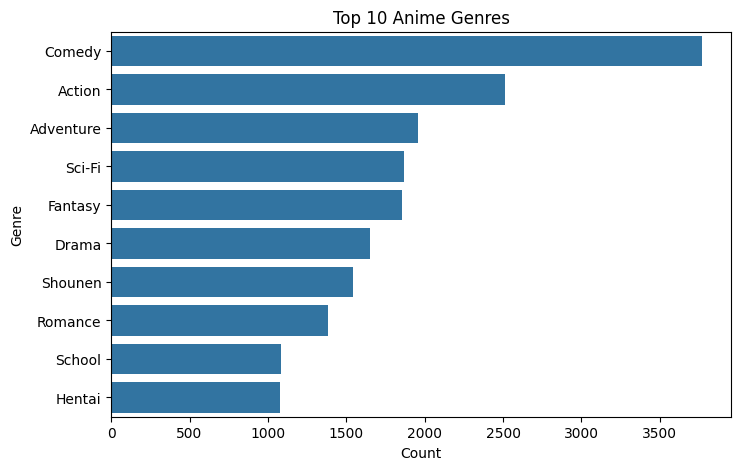

In [26]:
# Split genres into individual entries
genre_series = df_anime_copy_clean['genre'].str.split(', ')
genre_exploded = genre_series.explode()

top_genres = genre_exploded.value_counts().head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=top_genres.values, y=top_genres.index)
plt.title("Top 10 Anime Genres")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()

### 5.7 Anime Type Distribution
Analyzing anime types helps distinguish between long-form and short-form content.
- Observation: TV series form the majority of titles, followed by movies and OVAs, reflecting typical anime consumption patterns.

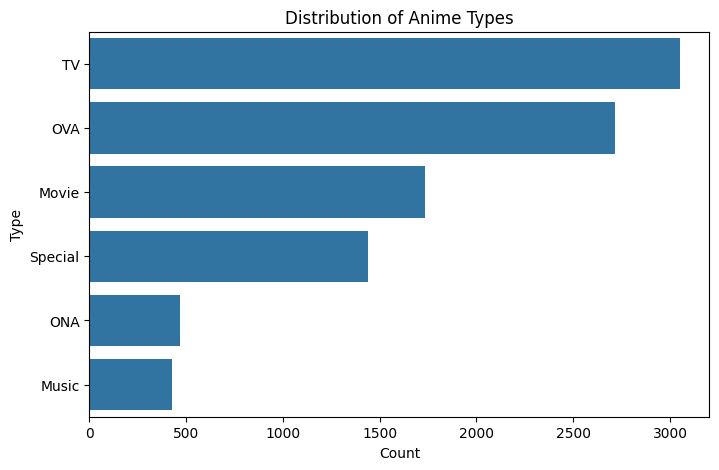

In [27]:
plt.figure(figsize=(8,5))
sns.countplot(y='type', data=df_anime_copy_clean, order=df_anime_copy_clean['type'].value_counts().index)
plt.title("Distribution of Anime Types")
plt.xlabel("Count")
plt.ylabel("Type")
plt.show()

### 5.8. Key EDA Insights

The exploratory data analysis revealed several important characteristics of the anime dataset:

- User rating behaviour is highly uneven, with most users rating only a small number of anime titles  
- Anime popularity follows a long-tail distribution, where a small number of titles receive most ratings  
- The user–anime rating matrix is highly sparse, a common challenge in recommender systems  
- Numerical features such as `episodes`, `members`, and `rating` vary significantly in scale 

---
<a href=#six></a>
## **6. Recommender Systems**
<a href=#cont>Back to Table of Contents</a>

**Purpose:**  
Build recommender systems that can predict how a user will rate an anime they have not yet reviewed yet.

**Details:**  
This section follows the below structure:
- Collaborative filtering (user-based and item-based)
- Content-based filtering
- A comparison of approaches and discussion of trade-offs

---
### 6.1 Recommender System Overview

Recommender systems aim to predict user preferences by analysing past behaviour or item characteristics.  
In this project, two primary approaches are explored:

- **Collaborative Filtering** – based on similarities between users or items  
- **Content-Based Filtering** – based on similarities between anime attributes  

These approaches are complementary and highlight different strengths and limitations.

---

### 6.2 Collaborative Filtering

#### 6.2.1 Constructing the User–Item Utility Matrix



In [1]:
user_item_matrix = df_train_copy_clean.pivot_table(
    index='user_id',
    columns='anime_id',
    values='rating'
)

user_item_matrix.head()

NameError: name 'df_train_copy_clean' is not defined

#### 6.2.2 Handling Missing Values

Missing values are filled with 0 only for similarity calculations. This step allows similarity metrics to be computed while preserving the meaning of missing ratings.

In [ ]:
user_item_filled = user_item_matrix.fillna(0)

#### 6.2.2 User-Based Collaborative Filtering

User-based collaborative filtering assumes that users with similar rating patterns will rate unseen anime similarly.

This method provides personalised recommendations but can struggle when users have limited rating history (cold-start problem).

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

user_similarity = cosine_similarity(user_item_filled)

In [ ]:
def predict_user_based(user_id, anime_id, k=5):
    if user_id not in user_item_matrix.index or anime_id not in user_item_matrix.columns:
        return df_train_copy_clean['rating'].mean()

    user_idx = user_item_matrix.index.get_loc(user_id)
    similarity_scores = user_similarity[user_idx]

    anime_ratings = user_item_matrix[anime_id]
    rated_users = anime_ratings.dropna().index

    if len(rated_users) == 0:
        return df_train_copy_clean['rating'].mean()

    top_users = (
        pd.Series(similarity_scores, index=user_item_matrix.index)
        .loc[rated_users]
        .sort_values(ascending=False)
        .head(k)
    )

    ratings = anime_ratings.loc[top_users.index]
    return np.average(ratings, weights=top_users)

### 6.2.4 Item-Based Collaborative Filtering

Item-based collaborative filtering assumes that anime which receive similar ratings are similar, and users will rate similar anime in similar ways.

Item-based filtering is often more stable than user-based filtering, particularly when users have sparse rating histories.



In [ ]:
item_similarity = cosine_similarity(user_item_filled.T)

In [ ]:
def predict_item_based(user_id, anime_id, k=5):
    if user_id not in user_item_matrix.index or anime_id not in user_item_matrix.columns:
        return df_train_copy_clean['rating'].mean()

    user_ratings = user_item_matrix.loc[user_id].dropna()
    if len(user_ratings) == 0:
        return df_train_copy_clean['rating'].mean()

    anime_idx = user_item_matrix.columns.get_loc(anime_id)
    similarity_scores = item_similarity[anime_idx]

    similar_items = (
        pd.Series(similarity_scores, index=user_item_matrix.columns)
        .loc[user_ratings.index]
        .sort_values(ascending=False)
        .head(k)
    )

    ratings = user_ratings.loc[similar_items.index]
    return np.average(ratings, weights=similar_items)

---
### 6.3 Content-Based Filtering

#### 6.3.1 Building an Anime Similarity Matrix

For simplicity and alignment with the course examples, anime similarity is computed using numerical features.

Content-based filtering enables recommendations based on anime characteristics alone and does not depend on other users’ ratings.

#### 6.3.2 Concept

Content-based filtering recommends anime based on item attributes rather than user interactions.
If a user likes certain types of anime, similar anime can be recommended even if no other users have rated them.

This approach is particularly useful for addressing cold-start problems.

In [ ]:
# 1) Recreate numeric-only dataframe
df_anime_nf = df_anime_copy_clean[['episodes', 'members', 'rating']].copy()

df_anime_nf.head()

,episodes,members,rating
0,1,200630,9.37
1,64,793665,9.26
2,51,114262,9.25
3,24,673572,9.17
4,51,151266,9.16


In [ ]:
print("Missing values in numeric dataset:")
print(df_anime_nf.isnull().sum())

Missing values in numeric dataset:
episodes    0
members     0
rating      2
dtype: int64


In [ ]:
# 2) Force columns to numeric (turn 'Unknown' and other strings into NaN)
for col in ['episodes', 'members', 'rating']:
    df_anime_nf[col] = pd.to_numeric(df_anime_nf[col], errors='coerce')

Handling Missing Values

During data cleaning, missing rating values were intentionally retained to preserve dataset integrity.
However, PCA requires complete numerical input and cannot be applied to data containing missing values.

To address this, rows containing missing numerical values are temporarily excluded for PCA only.
No imputation is performed, and the original dataset remains unchanged.

In [ ]:
# Temporarily remove rows with missing values for PCA
df_anime_nf_clean = df_anime_nf.dropna()

print(df_anime_nf.dtypes)
print("Missing values after coercion:\n", df_anime_nf.isnull().sum())
print("Shape after dropna:", df_anime_nf_clean.shape)

episodes    float64
members       int64
rating      float64
dtype: object
Missing values after coercion:
 episodes    3
members     0
rating      2
dtype: int64
Shape after dropna: (9833, 3)


Feature Scaling

Since PCA is sensitive to differences in feature scale, standardisation is applied so that each feature contributes equally to the analysis.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_anime_nf_scaled = scaler.fit_transform(df_anime_nf_clean)
df_anime_nf_scaled.shape

(9833, 3)

In [ ]:

from sklearn.metrics.pairwise import cosine_similarity

anime_similarity = cosine_similarity(df_anime_nf_scaled)

In [ ]:
def recommend_similar_anime(anime_id, top_n=5):
    if anime_id not in df_anime_copy_clean['anime_id'].values:
        return []

    anime_index = df_anime_copy_clean.index.get_loc(
        df_anime_copy_clean[df_anime_copy_clean['anime_id'] == anime_id].index[0]
    )

    similarity_scores = anime_similarity[anime_index]
    similar_indices = similarity_scores.argsort()[::-1][1:top_n+1]

    return df_anime_copy_clean.iloc[similar_indices][['anime_id', 'name']]

---
<a href=#seven></a>
## **7. Evaluation and Validation**
<a href=#cont>Back to Table of Contents</a>

**Purpose:**  
Evaluate the effectiveness of the recommender system models in predicting user ratings for unseen anime titles.

**Details:**  
Since the provided `test.csv` dataset does not contain ground-truth ratings, model performance is assessed using a **hold-out validation set** created from the training data. This approach is consistent with the course examples and allows for quantitative comparison of different recommender approaches.




### 7.1 Train–Validation Split

A subset of the training data is held out to simulate unseen user–anime interactions.  
The remaining data is used to train the recommender models.

🔹 1. Input Data for Clustering

The PCA-transformed features derived from numerical anime metadata are used as input for clustering.

In [ ]:
from sklearn.model_selection import train_test_split

train_subset, validation_subset = train_test_split(
    df_train_copy_clean,
    test_size=0.2,
    random_state=42
)

train_subset.shape, validation_subset.shape

🔹 2. K-Means Clustering

K-Means clustering partitions data into K distinct clusters by minimising within-cluster variance.
Each data point is assigned to exactly one cluster, and clusters are assumed to be approximately spherical.

In [47]:
from sklearn.cluster import KMeans

inertia = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

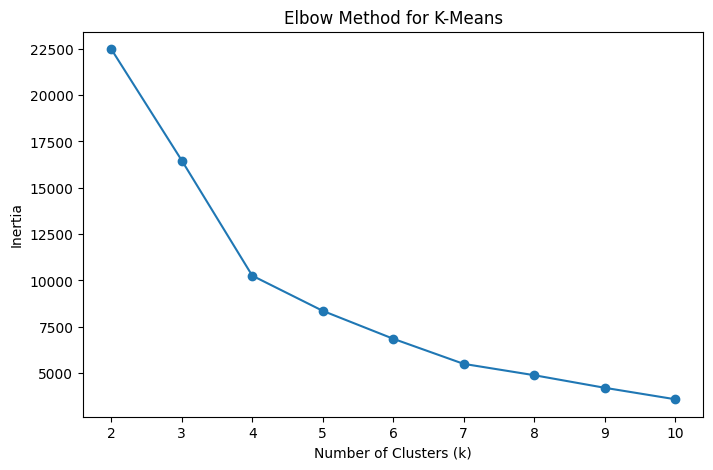

In [48]:
plt.figure(figsize=(8,5))
plt.plot(k_values, inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for K-Means")
plt.show()

In [49]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_pca)

kmeans_labels[:10]

array([2, 2, 0, 2, 2, 0, 2, 0, 0, 0], dtype=int32)

🔹 3. Hierarchical (Agglomerative) Clustering

Hierarchical clustering builds a hierarchy of clusters without requiring a predefined number of clusters at the outset.
Agglomerative clustering starts with each data point as its own cluster and merges clusters iteratively based on similarity.

Hierarchical clustering can capture more complex cluster relationships than K-Means and does not rely on centroid initialisation.

In [50]:
from sklearn.cluster import AgglomerativeClustering

agglo = AgglomerativeClustering(
    n_clusters=3,
    linkage='ward'
)

agglo_labels = agglo.fit_predict(X_pca)

agglo_labels[:10]

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1])

Observations:

Both methods identify groupings of anime with similar numerical characteristics

Differences in cluster assignments highlight varying assumptions between algorithms

Clustering provides insight into structure but does not directly predict user ratings

These findings inform the next modelling stage: recommender systems for rating prediction.

In [252]:
# Convert all boolean (True/False) columns to 1/0
df_model = df_model.astype({col: int for col in df_model.select_dtypes(include="bool").columns})

In [253]:
# Find any non-numeric columns still in df_model
non_numeric = df_model.select_dtypes(exclude=["number"]).columns.tolist()
print("Non-numeric columns:", non_numeric)

# Show some unique values for each
for col in non_numeric:
    print(f"{col} -> {df_model[col].unique()[:10]}")

Non-numeric columns: []


🔹 2. Scale Numeric Variables



In [255]:
from sklearn.preprocessing import StandardScaler

# Make a copy
scaled_df = df_model.copy()

# Separate target

X = scaled_df.drop(columns=[TARGET])
y = scaled_df[TARGET]

# Scale features
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns, index=X.index)

print("Scaled feature matrix shape:", X_scaled.shape)

Scaled feature matrix shape: (1000, 140)


In [261]:
assert TARGET in df_model.columns, "Target not found."

# numeric predictors only (exclude target)
X = df_model.drop(columns=[TARGET]).select_dtypes(include="number")
y = df_model[TARGET].astype(int)

# 1) Correlation matrix of predictors
corr_matrix = X.corr()

# 2) Find highly correlated pairs (off-diagonal)
threshold = 0.75
corr_pairs = []
cols = corr_matrix.columns

for i in range(len(cols)):
    for j in range(i+1, len(cols)):
        val = corr_matrix.iloc[i, j]
        if abs(val) > threshold:
            corr_pairs.append((cols[i], cols[j], val))

# 3) DataFrame of highly correlated pairs
high_corr_df = pd.DataFrame(corr_pairs, columns=["Variable_1", "Variable_2", "Correlation_between_vars"])

# 4) Add each variable’s correlation with the target
corr_with_target = pd.concat([X, y], axis=1).corr()[TARGET]

high_corr_df["Var1_to_Target"] = high_corr_df["Variable_1"].map(corr_with_target)
high_corr_df["Var2_to_Target"] = high_corr_df["Variable_2"].map(corr_with_target)

# 5) Sort by absolute inter-feature correlation
high_corr_df = high_corr_df.sort_values(by="Correlation_between_vars", key=lambda s: s.abs(), ascending=False)

# peek
display(high_corr_df.head(20))

# 6) Choose which column to drop from each pair:
#    drop the one with LOWER absolute correlation to the target
to_drop = set()
for v1, v2, r, c1, c2 in high_corr_df[["Variable_1","Variable_2","Correlation_between_vars","Var1_to_Target","Var2_to_Target"]].itertuples(index=False):
    # if one already marked for drop, skip decision
    if v1 in to_drop or v2 in to_drop:
        continue
    drop_col = v1 if abs(c1) < abs(c2) else v2
    to_drop.add(drop_col)

print("Dropping due to high inter-correlation:", sorted(to_drop))

# 7) Build reduced feature set
X_reduced = X.drop(columns=list(to_drop), errors="ignore")
print("Original feature count:", X.shape[1], "| Reduced:", X_reduced.shape[1])

# Optional: reattach target for a new modeling frame
df_model_reduced = pd.concat([X_reduced, y], axis=1)

,Variable_1,Variable_2,Correlation_between_vars,Var1_to_Target,Var2_to_Target
3,total_claim_amount,vehicle_claim,0.982773,0.163651,0.170049
0,months_as_customer,age,0.922035,0.020544,0.011652
5,vehicle_claim,collision_type_Unknown,-0.838674,0.170049,-0.169527
4,total_claim_amount,collision_type_Unknown,-0.834874,0.163651,-0.169527
2,total_claim_amount,property_claim,0.810475,0.163651,0.138665
1,total_claim_amount,injury_claim,0.804113,0.163651,0.091567
6,auto_make_Jeep,auto_model_Wrangler,0.781349,-0.051462,-0.062122


Dropping due to high inter-correlation: ['age', 'auto_make_Jeep', 'collision_type_Unknown', 'total_claim_amount']
Original feature count: 140 | Reduced: 136


In [263]:
print("X_reduced:", X_reduced.shape)
print("y shape:", y.shape)

X_reduced: (1000, 136)
y shape: (1000,)


In [280]:
# Separate data into independent (X) and independent (y) variables
X_names = [col for col in df_model_reduced.columns if col != TARGET]
X_data = df_model_reduced[X_names]
y_data = df_model_reduced[TARGET]

In [281]:
# Normalize data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_data)
X_normalize = pd.DataFrame(X_scaled, columns=X_data.columns)

In [282]:
from sklearn.feature_selection import VarianceThreshold

# Create VarianceThreshold object
selector = VarianceThreshold(threshold=0.05)

# Use the object to apply the threshold on data
selector.fit(X_normalize)

,threshold,0.05


In [283]:
# Get column variances
column_variances = selector.variances_

vars_dict = {}
vars_dict = [{"Variable_Name": c_name, "Variance": c_var}
             for c_name, c_var in zip(X_normalize.columns, column_variances)]
df_vars = pd.DataFrame(vars_dict)
df_vars.sort_values(by='Variance', ascending=False)

,Variable_Name,Variance
4,insured_sex,0.248631
88,incident_type_Single Vehicle Collision,0.240591
78,incident_severity_Minor Damage,0.228684
135,policy_state_OH,0.228096
11,police_report_available,0.215404
...,...,...
38,auto_model_C300,0.017676
69,auto_model_X6,0.015744
53,auto_model_M5,0.014775
37,auto_model_Accord,0.012831


In [275]:
# Select new columns
X_new = X_normalize[X_normalize.columns[selector.get_support(indices=True)]]

# Save variable names for later
X_var_names = X_new.columns

# View first few entries
X_new.head()

,months_as_customer,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,capital_gains,capital_loss,number_of_vehicles_involved,property_damage,bodily_injuries,...,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,policy_state_IN,policy_state_OH
0,0.684760,0.333333,0.603112,0.0,1.0,0.530348,0.000000,0.000000,1.0,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.475992,1.000000,0.473214,0.5,1.0,0.000000,0.000000,0.000000,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.279749,1.000000,0.606972,0.5,0.0,0.349254,0.000000,0.666667,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.534447,1.000000,0.608582,0.6,0.0,0.486567,0.561656,0.000000,1.0,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.475992,0.333333,0.712760,0.6,1.0,0.656716,0.414041,0.000000,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [267]:
import statsmodels.api as sm
# Separate dependent and independent
X_names = [col for col in df_model_reduced.columns if col != TARGET]
X = df_model_reduced[X_names].astype(float)
y = df_model_reduced[TARGET].astype(int)

# Add constant (intercept)
X = sm.add_constant(X, has_constant="add")

# Logistic regression
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Summary
print(result.summary())

         Current function value: 0.000015
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:         fraud_reported   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      875
Method:                           MLE   Df Model:                          124
Date:                Fri, 19 Sep 2025   Pseudo R-squ.:                   1.000
Time:                        15:41:38   Log-Likelihood:              -0.015004
converged:                      False   LL-Null:                       -559.02
Covariance Type:            nonrobust   LLR p-value:                1.465e-159
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                    -16.3044        nan        nan        nan      

c:\Programs\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [268]:
import statsmodels.api as sm

logit_model = sm.Logit(y, X)
result = logit_model.fit_regularized(method="l1", maxiter=100)
print(result.summary())

Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.362290725593113e-12
            Iterations: 57
            Function evaluations: 121
            Gradient evaluations: 57
                           Logit Regression Results                           
Dep. Variable:         fraud_reported   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      863
Method:                           MLE   Df Model:                          136
Date:                Fri, 19 Sep 2025   Pseudo R-squ.:                   1.000
Time:                        15:44:31   Log-Likelihood:            -1.3623e-09
converged:                       True   LL-Null:                       -559.02
Covariance Type:            nonrobust   LLR p-value:                6.216e-154
                                             coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------

---
<a href=#seven></a>
## **Evaluation and Validation**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Evaluate and validate the effectiveness and accuracy of the models.
* **Details:** Present metrics used to evaluate the models, such as accuracy, precision, recall, F1-score, etc. Discuss validation techniques employed, such as cross-validation or train/test split.
---

In [ ]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#eight></a>
## **Final Model**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Present the final model and its performance.
* **Details:** Highlight the best-performing model and discuss its configuration, performance, and why it was chosen over others.
---


In [ ]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#nine></a>
## **Conclusion and Future Work**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Summarize the findings and discuss future directions.
* **Details:** Conclude with a summary of the results, insights gained, limitations of the study, and suggestions for future projects or improvements in methodology or data collection.
---


In [ ]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#ten></a>
## **References**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Provide citations and sources of external content.
* **Details:** List all the references and sources consulted during the project, including data sources, research papers, and documentation for tools and libraries used.
---

In [ ]:
#Please use code cells to code in and do not forget to comment your code.

## Additional Sections to Consider

* ### Appendix: 
For any additional code, detailed tables, or extended data visualizations that are supplementary to the main content.

* ### Contributors: 
If this is a group project, list the contributors and their roles or contributions to the project.
